In [281]:
#install pandas
#install pandas
import math
import numpy as np
import scipy as sp
from scipy import integrate
import numpy.random as npr  
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as npr
import datetime
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import *
import seaborn as sns
#seaborn.set_style("ticks")

In [282]:
npr.seed(1234)
M     = 365
N     = 1
So    = 100
T     = 1
dt    = T/M
mu    = 0.3
sigma = 0.2
Z_1   = np.random.normal(size =[N , M ])
Z_2   = np.random.normal(size =[N , M ])
St    = np.zeros([N , M +1])
a     = -0.1
b     = 0.4
kappa = np.exp (a +0.5* b**2)-1
lambd = 0.3


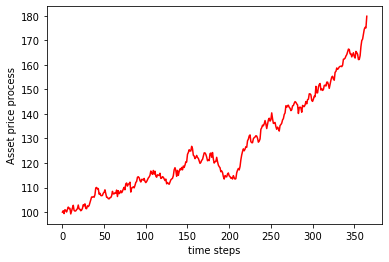

<Figure size 432x288 with 0 Axes>

In [283]:
#Geometric Brownian Motion

St[:,0]          = So

for i in range (M):
    St[: , i +1] = St [: , i ]* np . exp(( mu - sigma **2/2)* dt+ sigma * np.sqrt( dt )* Z_1[: , i ])

plt.plot(np.transpose(St),'r')
plt.ylabel('Asset price process')
plt.xlabel('time steps')
plt.show()
plt.savefig('gbm',transparent=T)

In [284]:
#Merton Jump Diffusion Model

Z_1   = np.random.normal(size =[N , M ])
Z_2   = np.random.normal(size =[N , M ])
P     = np.random.poisson(lambd * dt , [N , M ])
St    = np.zeros([N , M +1])
a     = -0.1
b     = 0.4
kappa = np.exp (a +0.5* b**2)-1
lambd = 0.3

In [285]:
St              = np.zeros([N , M +1])
St[:,0]        = So

for i in range (M):
    SBS         = sp.exp (( mu - lambd * kappa -( sigma **2)/2)* dt+ sigma * sp.sqrt ( dt )* Z_1 [: , i ])
    St[: ,i +1] = St[:,i]* SBS * sp.exp(a*P [: , i]+ sp.sqrt(b **2) * sp.sqrt (P[: , i ])* Z_2[: , i ])


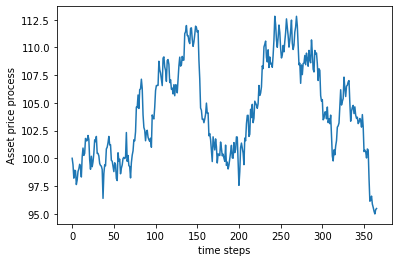

In [286]:
plt.plot(np.transpose(St))
plt.ylabel('Asset price process')
plt.xlabel('time steps')
plt.savefig('mertonjumppath',transparent=T)

In [287]:
#Heston stochastic volatility 
St      = np.zeros([N , M +1])
v       = np.zeros([N , M +1])
St[:,0] = So
v[:,0]  = theta

w       = np.random.normal(size =[N , M ])
rho     = 0.8
w2      = rho * w + sp.sqrt(1-rho**2) * npr.standard_normal([N,M])
sigma_v = 0.1
theta   = 0.2
kappa   = 0.7




In [288]:
for i in range(M):
    v[:,i+1] = v[:,i] + kappa * (theta - np.maximum(0,v[:,i])) * dt + sigma_v * sp.sqrt(np.maximum(0,v[:,i])) * w2[:,i]
    St[:,i+1] = St[: , i]* sp. exp(( mu - v[:,i] * 0.5)* dt+ sp.sqrt(v[:,i] * dt) * w[:,i])                 

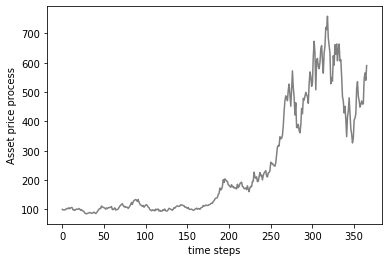

In [289]:
plt.plot(np.transpose(St),'grey')
plt.savefig('hestonpath',transparent=T)
plt.ylabel('Asset price process')
plt.xlabel('time steps')
plt.savefig('hestonpath',transparent=T)